In [459]:
import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

In [468]:
def stats_analysis(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    df3 = df2.loc[~df2.index.str.contains("None")]
    
    df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    counts = df_time_access.values.flatten()
    counts2 = counts[(counts>0) & (counts<120)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(1, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")
    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.show()
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('source_neighbors').mean()['count'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('source_neighbors').mean()['count']
    count_mean_limit_100 = count_mean[count_mean.index < 100]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_100)
    plt.title("count_mean_limit_100")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(df2.groupby('target_neighbors').mean()['count'])
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    
    print("count mean")
    print(df2['count'].mean())
    print("count max")
    print(max(df2['count']))
    
    
    count_groups = df2.groupby('count').size()
    
    groupings_percentages = []
    for i in range(5, max(df2['count']), 10):
        groupings_percentages.append((i, sum(count_groups[count_groups > i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits in total")
    plt.ylabel("fraction on total visits")
    plt.show()
    
    
    plt.plot(df2.groupby('count').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('count').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [462]:
df = pd.read_json("data/stats.json")

In [470]:
df1 = pd.read_json("data/stats1.json")

--  --------
 1  0.907047
 2  0.785129
 3  0.674854
 4  0.583387
 5  0.508072
 6  0.445686
 7  0.393507
 8  0.349443
 9  0.312054
10  0.280288
11  0.252929
12  0.229341
13  0.208874
14  0.190795
15  0.175073
16  0.161149
17  0.148859
18  0.137787
19  0.127972
20  0.119129
--  --------


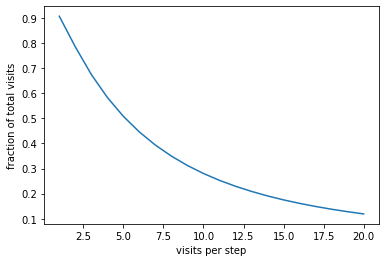

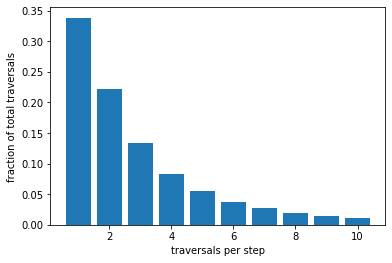

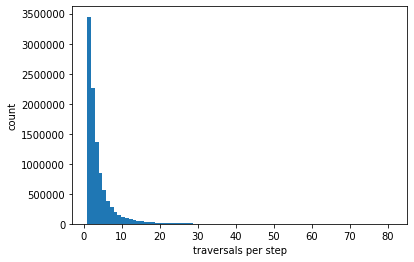

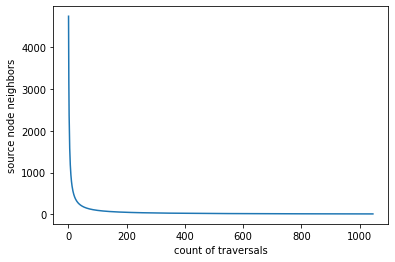

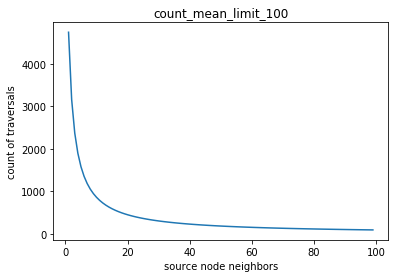

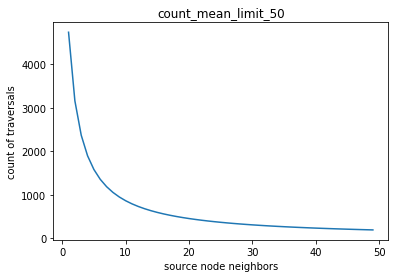

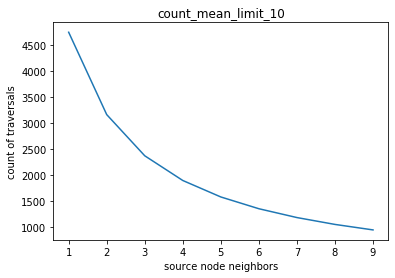

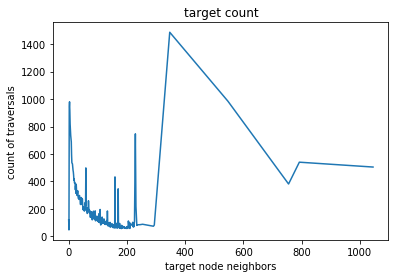

count mean
212.12318635842377
count max
9360
---  ---------  ----
  2  0.948761     25
  3  0.936069     35
  4  0.923344     45
  5  0.906774     55
  6  0.894741     65
  7  0.880104     75
  8  0.870204     85
  9  0.858238     95
 10  0.847197    105
 11  0.834311    115
 12  0.827635    125
 13  0.817553    135
 14  0.809725    145
 15  0.80306     155
 16  0.797731    165
 17  0.787421    175
 18  0.775416    185
 19  0.764879    195
 20  0.757117    205
 21  0.746669    215
 22  0.736941    225
 23  0.726725    235
 24  0.720099    245
 25  0.710394    255
 26  0.700278    265
 27  0.691353    275
 28  0.682095    285
 29  0.680494    295
 30  0.675503    305
 31  0.665221    315
 32  0.661653    325
 33  0.654307    335
 34  0.648634    345
 35  0.640884    355
 36  0.634817    365
 37  0.628657    375
 38  0.626541    385
 39  0.620037    395
 40  0.617821    405
 41  0.610962    415
 42  0.60863     425
 43  0.599124    435
 44  0.586875    445
 45  0.579379    455
 46  0.579

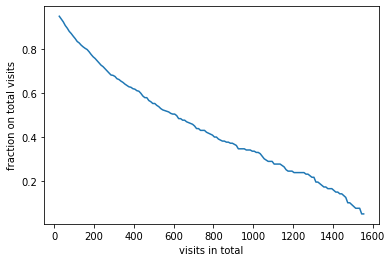

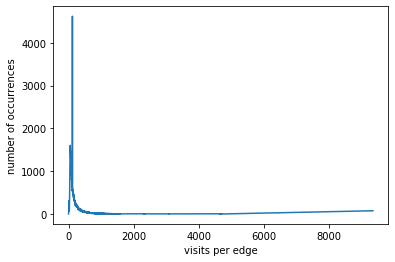

In [469]:
stats_analysis(df)

--  --------
 1  0.907024
 2  0.785043
 3  0.674761
 4  0.583225
 5  0.508166
 6  0.445763
 7  0.393469
 8  0.349373
 9  0.311964
10  0.28006
11  0.25281
12  0.229191
13  0.208761
14  0.190836
15  0.175116
16  0.161172
17  0.148811
18  0.137829
19  0.127971
20  0.119101
--  --------


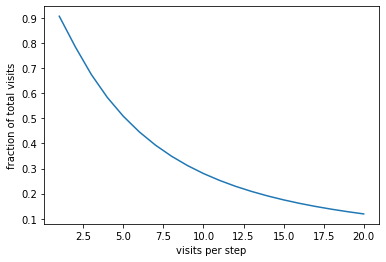

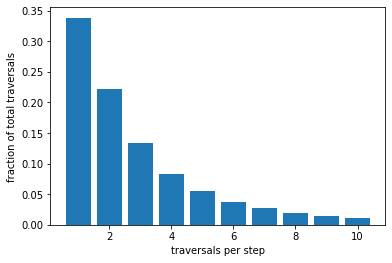

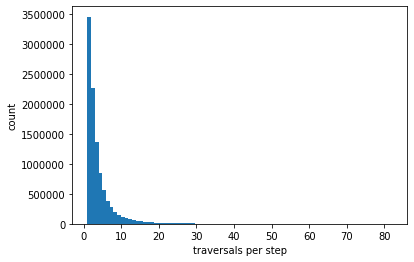

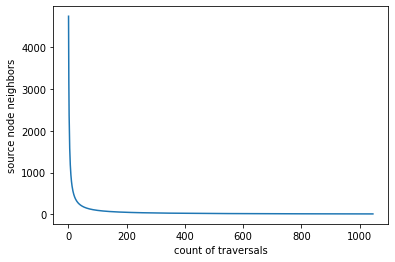

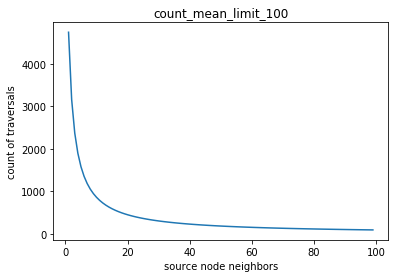

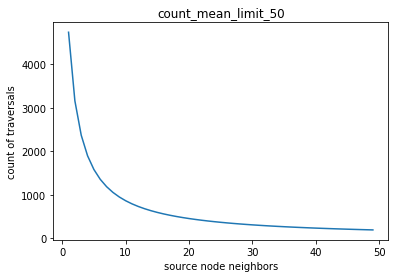

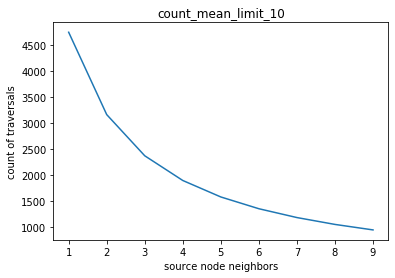

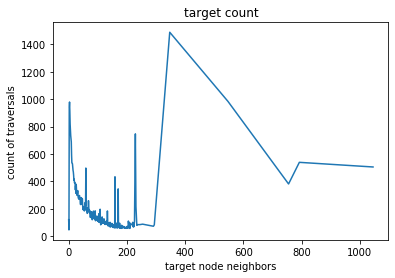

count mean
212.12318635842377
count max
9360
---  ---------  ----
  2  0.949814     25
  3  0.935443     35
  4  0.921876     45
  5  0.906253     55
  6  0.892492     65
  7  0.883041     75
  8  0.872354     85
  9  0.858787     95
 10  0.84384     105
 11  0.835896    115
 12  0.825226    125
 13  0.818849    135
 14  0.809542    145
 15  0.802889    155
 16  0.792141    165
 17  0.78736     175
 18  0.775305    185
 19  0.767937    195
 20  0.750148    205
 21  0.737223    215
 22  0.73355     225
 23  0.724664    235
 24  0.719324    245
 25  0.705513    255
 26  0.704095    265
 27  0.699624    275
 28  0.690328    285
 29  0.679043    295
 30  0.674018    305
 31  0.668849    315
 32  0.659997    325
 33  0.6527      335
 34  0.648961    345
 35  0.64315     355
 36  0.639139    365
 37  0.632934    375
 38  0.622386    385
 39  0.618065    395
 40  0.613627    405
 41  0.606835    415
 42  0.606835    425
 43  0.602082    435
 44  0.59965     445
 45  0.584664    455
 46  0.577

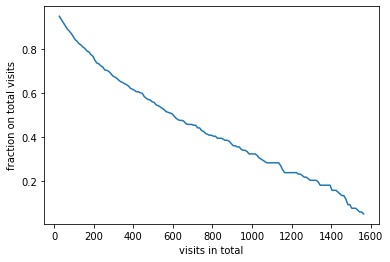

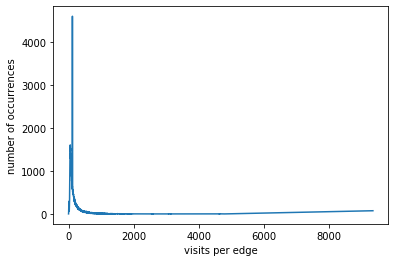

In [471]:
stats_analysis(df1)

In [236]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [237]:
df = pd.read_json("data/stats.json")

In [ ]:
df.index.values

In [238]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [239]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [240]:
df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)

In [ ]:
df3.time_access.values.tolist()

In [241]:
df_time_access = df_time_access.fillna(0)

In [ ]:
df_time_access.idxmax()

In [242]:
counts = df_time_access.values.flatten()


In [243]:
counts2 = counts[(counts>0) & (counts<120)]

In [451]:
len(counts2[counts2==1])/len(counts2)

0.3386031308932023

In [443]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [448]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [449]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [452]:
step_groupings

array([[ 1.        ,  0.90704724],
       [ 2.        ,  0.78512941],
       [ 3.        ,  0.67485376],
       [ 4.        ,  0.58338686],
       [ 5.        ,  0.50807214],
       [ 6.        ,  0.44568631],
       [ 7.        ,  0.39350719],
       [ 8.        ,  0.34944266],
       [ 9.        ,  0.31205351],
       [10.        ,  0.28028819],
       [11.        ,  0.2529286 ],
       [12.        ,  0.22934067],
       [13.        ,  0.20887383],
       [14.        ,  0.19079455],
       [15.        ,  0.17507334],
       [16.        ,  0.1611493 ],
       [17.        ,  0.14885945],
       [18.        ,  0.1377872 ],
       [19.        ,  0.12797202],
       [20.        ,  0.11912854]])

Text(0, 0.5, 'fraction of total traversals')

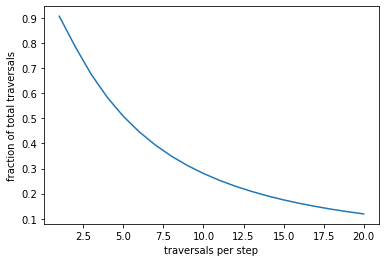

In [450]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

Text(0, 0.5, 'fraction of total traversals')

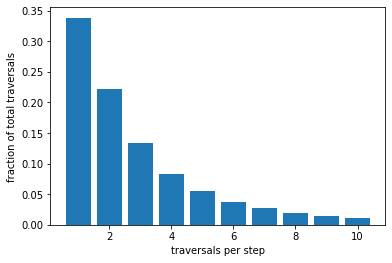

In [285]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

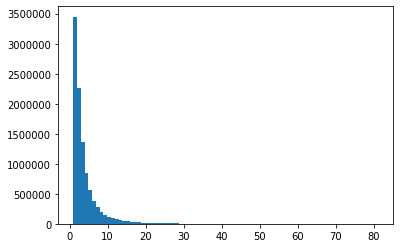

Text(0, 0.5, 'count')

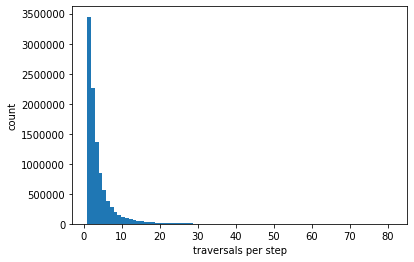

In [455]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

Text(0.5, 0, 'count of traversals')

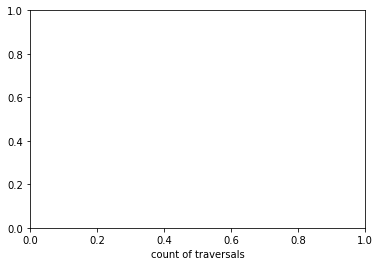

Text(0, 0.5, 'source node neighbors')

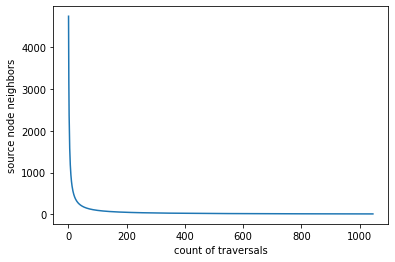

In [278]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [266]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [286]:
count_mean

source_neighbors
1       4740.000000
2       3160.000000
3       2370.000000
4       1896.000000
5       1580.000000
           ...     
347       27.241379
547       17.299270
755       12.539683
792       11.954603
1045       9.063098
Name: count, Length: 227, dtype: float64

In [273]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

Text(0.5, 0, 'source node neighbors')

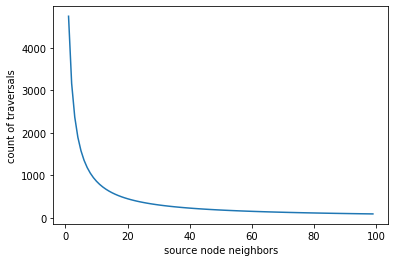

In [287]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'source node neighbors')

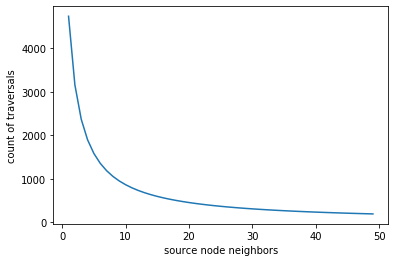

In [288]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'source node neighbors')

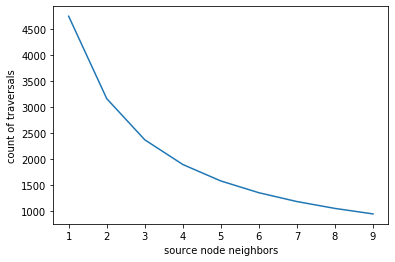

In [289]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'target node neighbors')

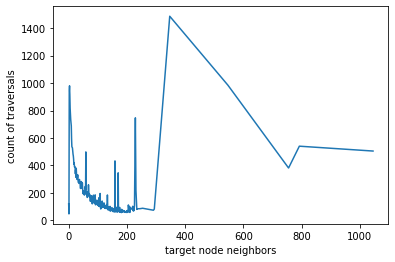

In [290]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [293]:
df2['count'].mean()

212.12318635842377

In [427]:
df2['count'].median()

115.0

In [299]:
max(df2['count'])

9360

In [435]:
df2['count']

(0, 1)          13
(0, 10)         30
(0, 100)        23
(0, 101)        25
(0, 102)        25
              ... 
(999, 925)     114
(999, 947)     142
(999, 966)     123
(999, 968)     173
(999, None)    120
Name: count, Length: 180507, dtype: int64

In [363]:
count_size = df2.groupby('count').size()

In [380]:
groupings_percentages = []
for i in range(5, max(df2['count']), 10):
    groupings_percentages.append((i, sum(count_groups[count_groups > i])/sum(count_groups)))

In [395]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [408]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [423]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [424]:
pd_groupings_sig

,fraction,bound
2,0.948761,25.0
3,0.936069,35.0
4,0.923344,45.0
5,0.906774,55.0
6,0.894741,65.0
...,...,...
151,0.077454,1515.0
152,0.077454,1525.0
153,0.077454,1535.0
154,0.051832,1545.0


Text(0, 0.5, 'fraction on total visits')

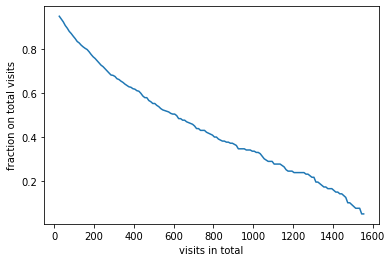

In [426]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

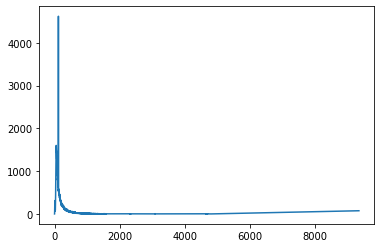

In [362]:
plt.plot(df2.groupby('count').size())

In [324]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [328]:
count_groups[count_groups < 10]

count
1       1
2       5
766     9
813     9
829     8
       ..
4782    1
4785    1
4789    1
4799    1
4813    1
Length: 1529, dtype: int64

In [335]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

count
1        (0, 10]
2        (0, 10]
3       (20, 30]
4       (40, 50]
5       (80, 90]
          ...   
4785     (0, 10]
4789     (0, 10]
4799     (0, 10]
4813     (0, 10]
9360    (70, 80]
Length: 2495, dtype: category
Categories (935, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (9310, 9320] < (9320, 9330] < (9330, 9340] < (9340, 9350]]

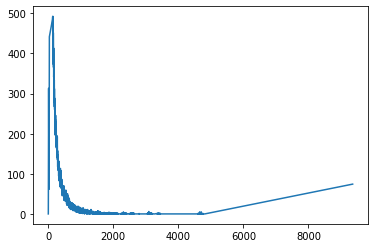

In [326]:
plt.plot(count_groups_500)

In [343]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [359]:
cut_df.groupby(0).size().head(20)

0
(0, 10]       1562
(10, 20]       213
(20, 30]       101
(30, 40]        68
(40, 50]        62
(50, 60]        44
(60, 70]        39
(70, 80]        23
(80, 90]        31
(90, 100]       19
(100, 110]      17
(110, 120]      17
(120, 130]      12
(130, 140]      10
(140, 150]      10
(150, 160]       8
(160, 170]       9
(170, 180]      11
(180, 190]      12
(190, 200]       7
dtype: int64